# **Tech Challenge**  👨🏻‍💻

**Problema:**

*   Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Exploração de dados** 🕵🏻



*   Carregue a base de dados e explore suas características;
*   Analise estatísticas descritivas e visualize distribuições relevantes.

In [2]:
df = pd.read_csv('../data/health_cost_data.csv')
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,renda_mensal
0,99.0,feminino,32.76,4.0,não,nordeste,26863.36,básico,sim,não,4053.96
1,31.0,NaN,31.91,1.0,não,nordeste,48510.73,premium,sim,sim,8210.46
2,53.0,masculino,24.86,0.0,sim,norte,22701.25,intermediário,sim,não,7498.52
3,NaN,desconhecido,18.21,4.0,sim,norte,24116.17,intermediário,não,não,6096.40
4,NaN,NaN,18.91,1.0,não,nordeste,36751.94,básico,não,não,4485.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   idade             65294 non-null   float64
 1   sexo              75398 non-null   object 
 2   imc               100000 non-null  float64
 3   filhos            100000 non-null  float64
 4   fumante           100000 non-null  object 
 5   região            100000 non-null  object 
 6   encargos          100000 non-null  float64
 7   tipo_plano        100000 non-null  object 
 8   uso_medicamento   100000 non-null  object 
 9   doencas_cronicas  100000 non-null  object 
 10  renda_mensal      100000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 8.4+ MB


In [4]:
df['filhos'] = df['filhos'].round().astype('Int64')
df['idade'] = df['idade'].round().astype('Int64')

In [5]:
df.isnull().sum()

idade               34706
sexo                24602
imc                     0
filhos                  0
fumante                 0
região                  0
encargos                0
tipo_plano              0
uso_medicamento         0
doencas_cronicas        0
renda_mensal            0
dtype: int64

In [6]:
print(df.describe(include='all'))

             idade       sexo            imc    filhos fumante    região  \
count      65294.0      75398  100000.000000  100000.0  100000    100000   
unique        <NA>          3            NaN      <NA>       2         4   
top           <NA>  masculino            NaN      <NA>     sim  nordeste   
freq          <NA>      26546            NaN      <NA>   50254     26369   
mean    122.184213        NaN      27.503473   2.61095     NaN       NaN   
std     214.258879        NaN       7.647369  1.776413     NaN       NaN   
min           15.0        NaN      12.240000       0.0     NaN       NaN   
25%           45.0        NaN      20.830000       1.0     NaN       NaN   
50%           92.0        NaN      27.320000       3.0     NaN       NaN   
75%          100.0        NaN      34.060000       4.0     NaN       NaN   
max         1168.0        NaN      47.950000       7.0     NaN       NaN   

             encargos tipo_plano uso_medicamento doencas_cronicas  \
count   100000.000

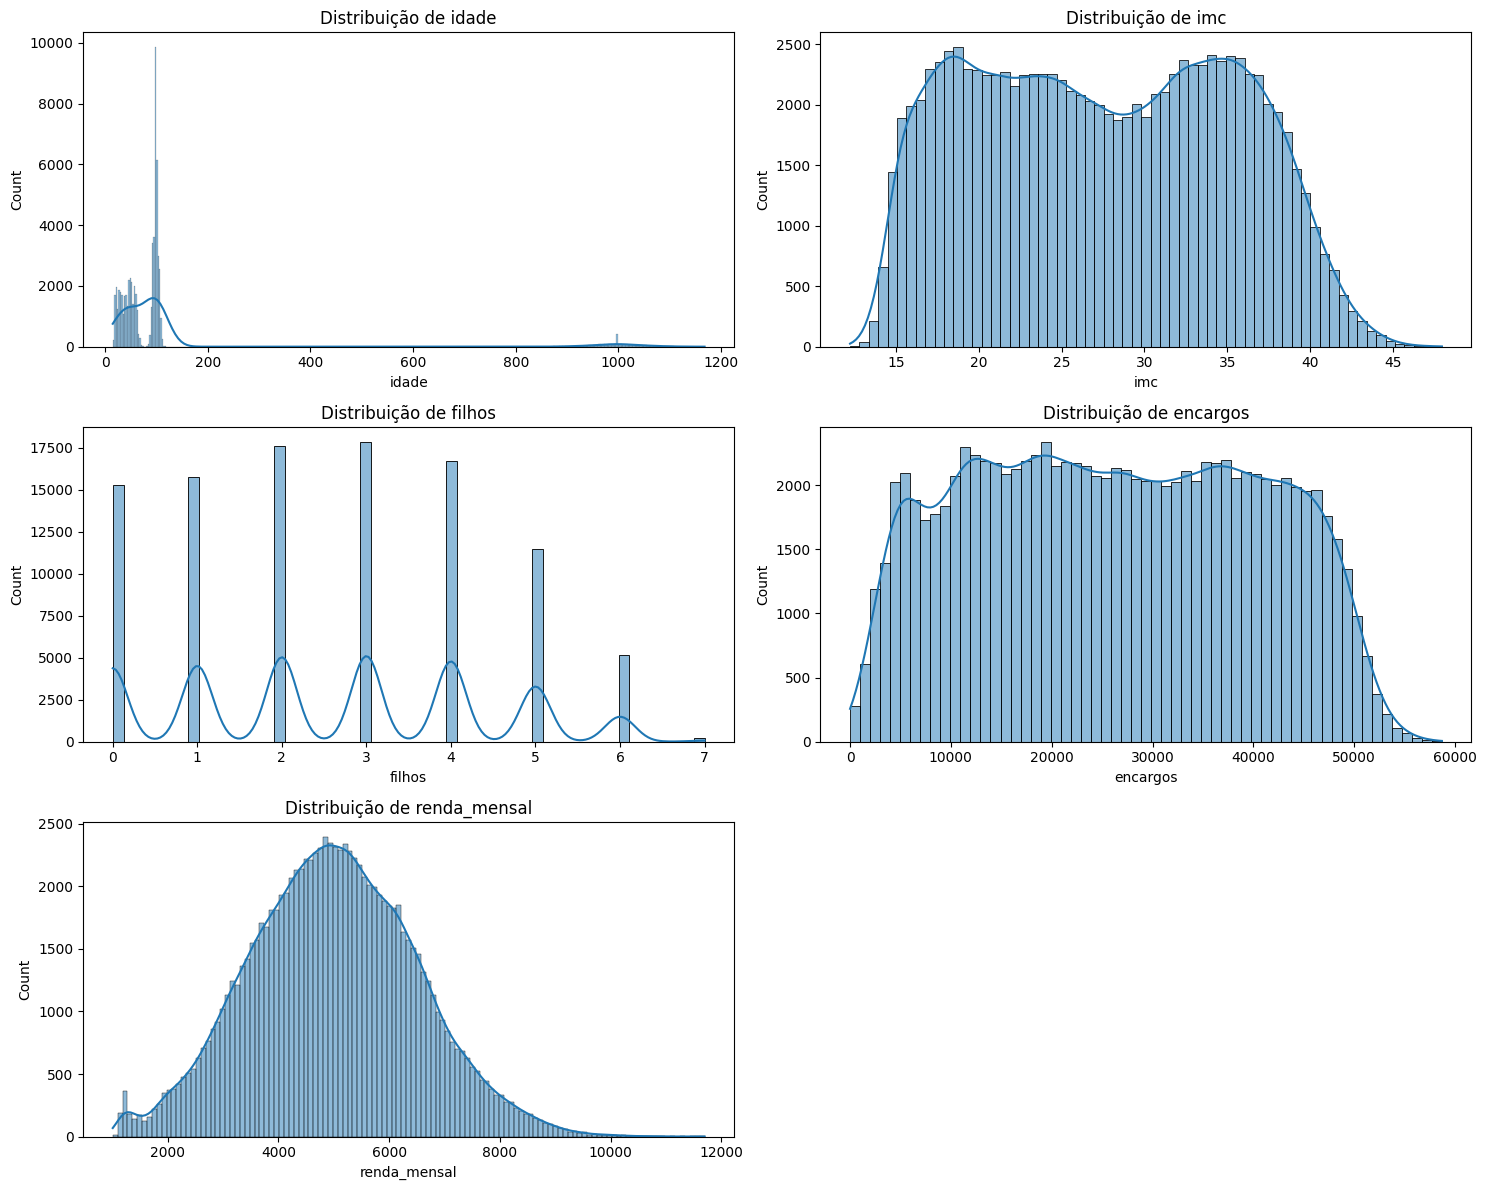

In [7]:
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:6]):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

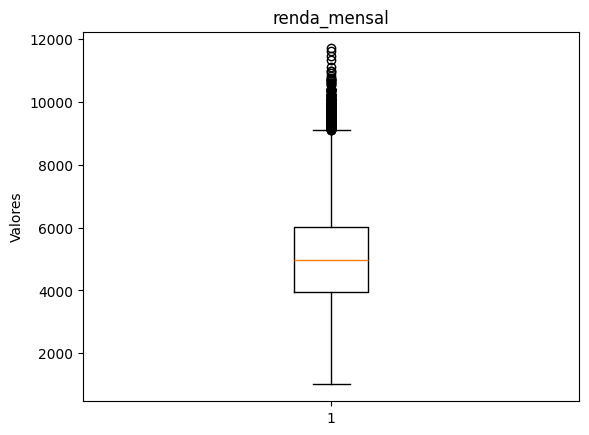

In [8]:
plt.boxplot(df['renda_mensal'])
plt.title('renda_mensal')
plt.ylabel('Valores')
plt.show()

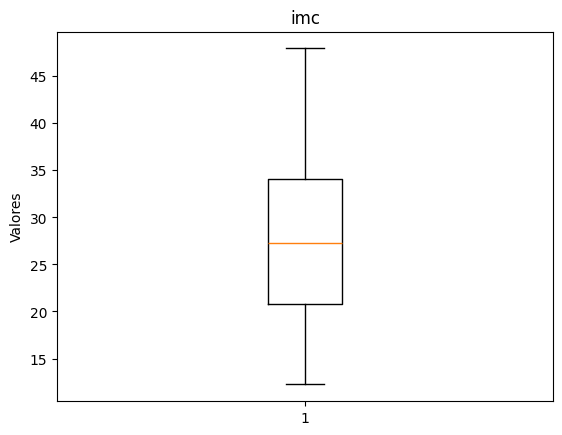

In [9]:
plt.boxplot(df['imc'])
plt.title('imc')
plt.ylabel('Valores')
plt.show()

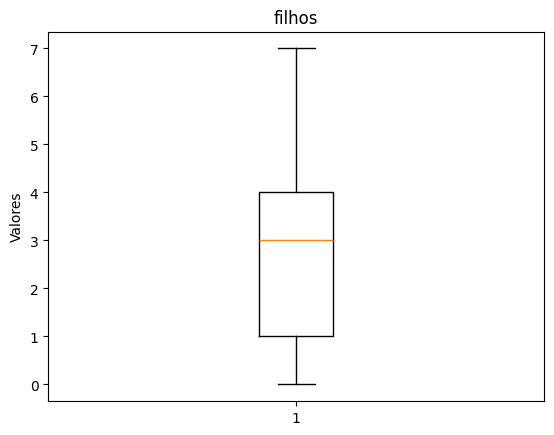

In [10]:
plt.boxplot(df['filhos'])
plt.title('filhos')
plt.ylabel('Valores')
plt.show()

# **Pré-processamento de dados** 🛠️
*   Realize a limpeza dos dados, tratando valores ausentes;
*   Converta variáveis categóricas em formatos adequados para modelagem.

* Idade:

In [11]:
# Solução 1 - Substituir por mediana.

# Calcular a mediana das idades válidas (excluindo nulos e o valor 99, que é considerado placeholder)
#mediana_idade_valida = df.loc[(df['idade'] != 99) & (~df['idade'].isnull()), 'idade'].median()

#print(f"Idade mediana: {mediana_idade_valida}")

# Substituir 99, 999 e NaN por 46.0
#df['idade'] = df['idade'].apply(lambda x: 46.0 if pd.isnull(x) or x == 999 or x == 99 else x)

In [12]:
df['idade_ausente'] = df['idade'].isnull() | (df['idade'] < 1) | (df['idade'] > 105)

In [13]:
df['idade_ausente'] = df['idade_ausente'].astype(int)

In [14]:
# Preencher idade inválida ou ausente com a mediana das idades válidas
mediana_idade_valida = df.loc[(df['idade'] >= 1) & (df['idade'] <= 105), 'idade'].median()

In [15]:
# Substitui valores inválidos na coluna idade por mediana_idade_valida
df['idade'] = df['idade'].apply(
    lambda x: mediana_idade_valida if pd.isnull(x) or x < 1 or x > 105 else x
)

# Mostrar as novas estatísticas
idade_minima_corrigida = df['idade'].min()
idade_maxima_corrigida = df['idade'].max()
mediana_idade_valida

print(f"idade minima: {idade_minima_corrigida}")
print(f"idade maxima: {idade_maxima_corrigida}")
print(f"mediana: {mediana_idade_valida}")

idade minima: 15.0
idade maxima: 105.0
mediana: 65.0


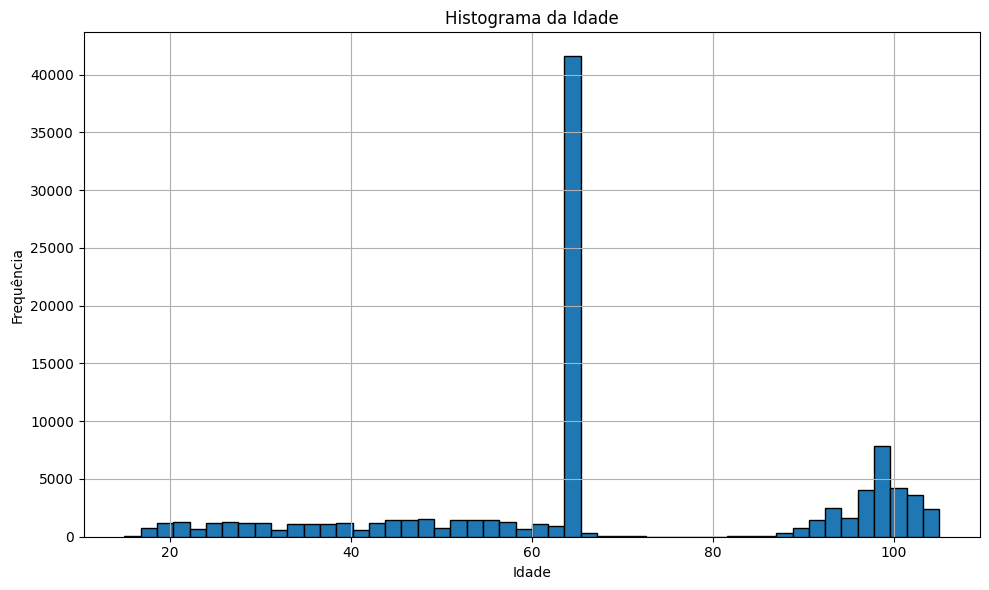

In [16]:
# Gerar histograma da coluna 'idade'
plt.figure(figsize=(10, 6))
plt.hist(df['idade'].dropna(), bins=50, edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print(df['idade'].unique())

[ 99.  31.  53.  65.  57.  52.  55.  47.  18.  61.  59.  19.  54.  34.
  39.  22.  35.  62.  20.  23.  26.  60.  56.  46.  42.  33.  41.  21.
  43.  45.  40.  30.  64.  50.  24.  27.  58.  51.  32.  49.  44.  25.
  37.  28.  38.  29.  48.  36.  66.  63.  67.  96.  98.  95.  97.  92.
 101. 100.  90. 104.  68. 103. 102.  87.  94.  93.  70. 105.  84.  16.
  89.  17.  91.  71.  88.  86.  85.  83.  73.  69.  80.  76.  82.  74.
  72.  79.  15.  75.  81.]


* Sexo

In [18]:
# Solução 1 - Substituir sexo a moda.

# Substituir valores nulos em 'sexo' pela moda (valor mais frequente)
#moda_genero = df['sexo'].mode()[0]
#print(moda_genero)

# Substituir nulos e 'desconhecido' por essa moda
#df['sexo'] = df['sexo'].replace(to_replace=[None, 'desconhecido'], value=moda_genero)
#df['sexo'] = df['sexo'].fillna(moda_genero)

# Verificar se ainda existem valores faltantes ou desconhecidos
#print(df['sexo'].value_counts(dropna=False))

In [19]:
# Distribuição da coluna 'sexo'
print(df['sexo'].value_counts(dropna=False))

sexo
masculino       26546
desconhecido    25230
NaN             24602
feminino        23622
Name: count, dtype: int64


In [20]:
df['sexo'] = df['sexo'].replace([None, 'desconhecido'], 'não informado')
df['sexo'] = df['sexo'].fillna('não informado')

* Renda

In [21]:
print(f"Renda máxima: {df['renda_mensal'].max():.2f}")
print(f"Renda mínima: {df['renda_mensal'].min():.2f}")
print(f"Renda média: {df['renda_mensal'].mean():.2f}")

Renda máxima: 11700.16
Renda mínima: 1004.91
Renda média: 4990.70


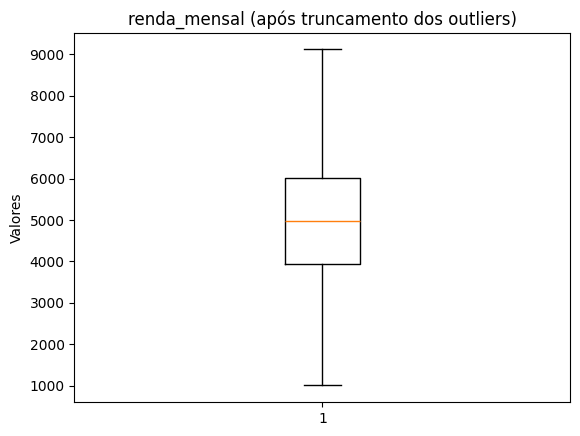

In [22]:
#Tratar outliers usando o método do IQR (Intervalo Interquartil)

Q1 = df['renda_mensal'].quantile(0.25)
Q3 = df['renda_mensal'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df['renda_mensal'] = df['renda_mensal'].clip(lower=limite_inferior, upper=limite_superior)


plt.boxplot(df['renda_mensal'])
plt.title('renda_mensal (após truncamento dos outliers)')
plt.ylabel('Valores')
plt.show()

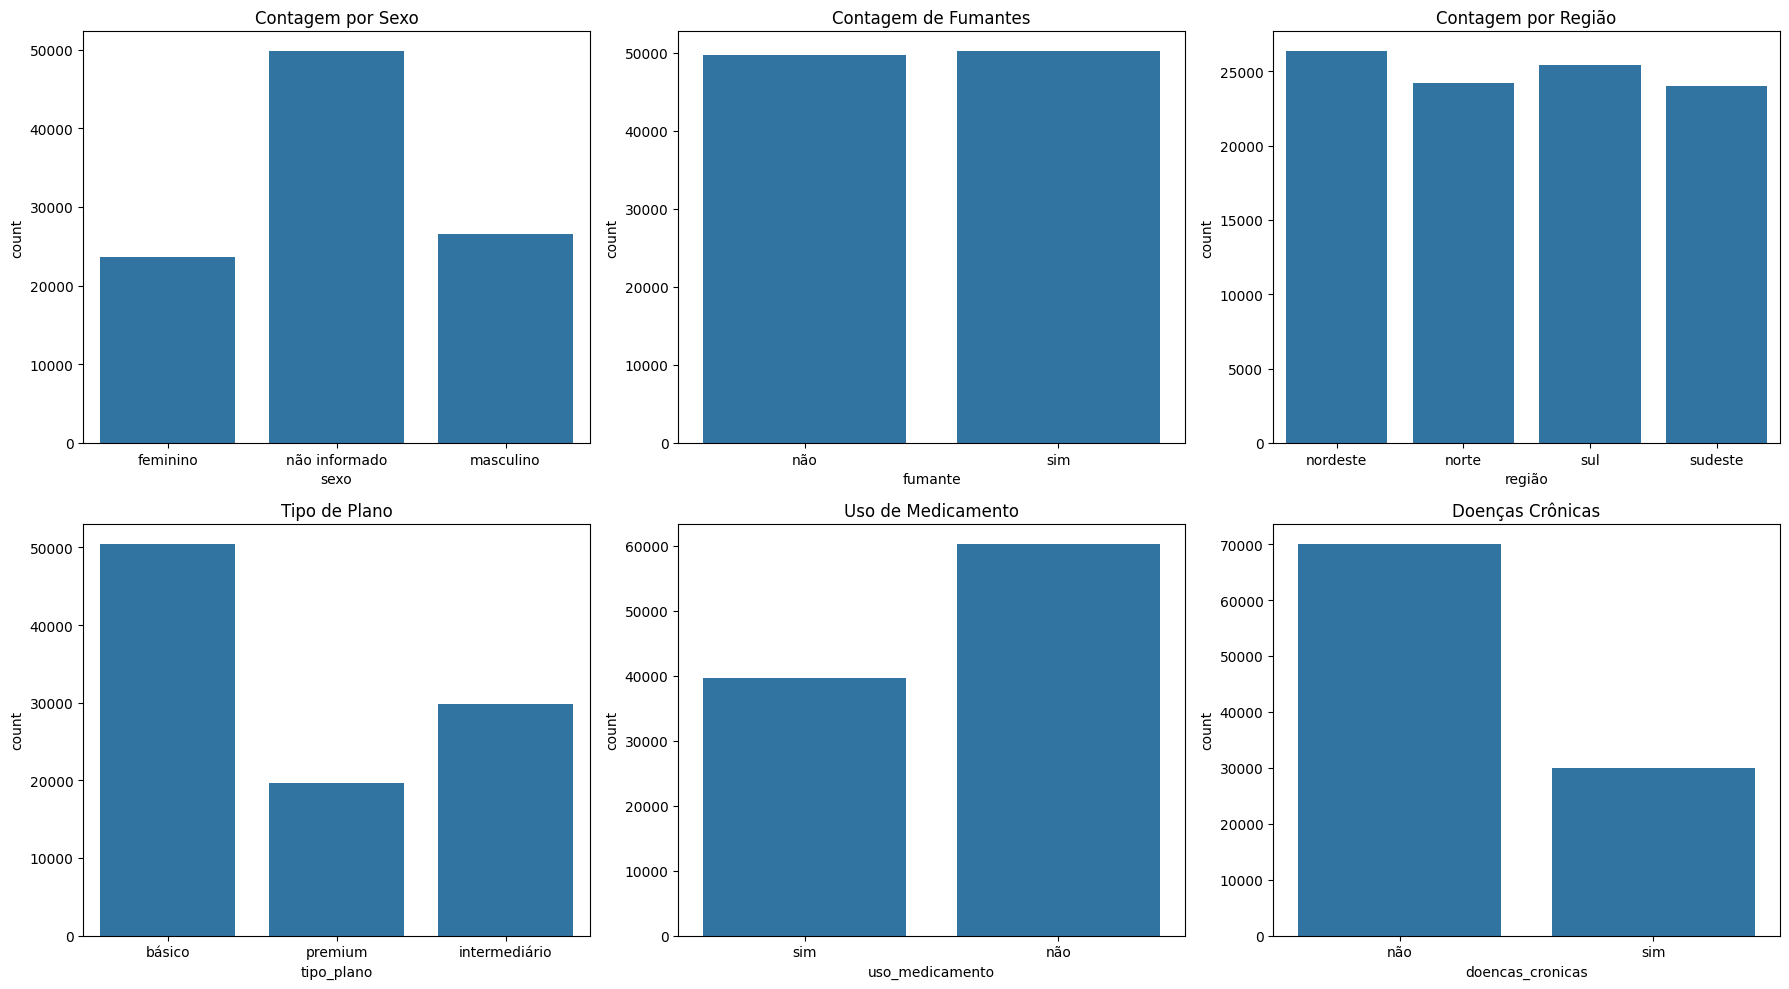

In [23]:
# Gráfico para atributos categóricos

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='sexo', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Contagem por Sexo')

sns.countplot(x='fumante', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Contagem de Fumantes')

sns.countplot(x='região', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Contagem por Região')

sns.countplot(x='tipo_plano', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tipo de Plano')

sns.countplot(x='uso_medicamento', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Uso de Medicamento')

sns.countplot(x='doencas_cronicas', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Doenças Crônicas')

plt.tight_layout()
plt.show()

* Categorizar

In [24]:
# Solução 1 - Categorizar utilizando get_dummies.

# Converta variáveis categóricas em formatos adequados para modelagem.


# df_encoded = pd.get_dummies(df, columns=['sexo', 'fumante', 'região',
#                                          'tipo_plano', 'uso_medicamento',
#                                          'doencas_cronicas'], drop_first=True)


# # Normalização de Colunas Numéricas
# scaler = StandardScaler()
# colunas_numericas = ['idade', 'imc', 'filhos', 'renda_mensal']
# df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# # Normalização de Colunas Booleanas
# df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

# print(df_encoded.dtypes)



In [25]:
label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
df['sexo'] = label_encoder.fit_transform(df['sexo'])
df['fumante'] = label_encoder.fit_transform(df['fumante'])
df['região'] = label_encoder.fit_transform(df['região'])
df['tipo_plano'] = label_encoder.fit_transform(df['tipo_plano'])
df['uso_medicamento'] = label_encoder.fit_transform(df['uso_medicamento'])
df['doencas_cronicas'] = label_encoder.fit_transform(df['doencas_cronicas'])

print(df.dtypes)

idade               float64
sexo                  int64
imc                 float64
filhos                Int64
fumante               int64
região                int64
encargos            float64
tipo_plano            int64
uso_medicamento       int64
doencas_cronicas      int64
renda_mensal        float64
idade_ausente         int64
dtype: object


# **Feature Engineering** ✨

In [26]:
# Melhora leitura de métricas
df['encargos'] = df['encargos'] / 1000

# Combinando duas featureas

df['idade_imc'] = df['idade'] * df['imc']
df['idade_filhos'] = df['idade'] * df['filhos']
df['idade_medicamento'] = df['idade'] * df['uso_medicamento']
df['genero_doenca_cronica'] = df['sexo'] * df['doencas_cronicas']
df['doencas_cronicas_medicamento'] = df['doencas_cronicas'] * df['uso_medicamento']
df['tipo_plano_renda'] = df['tipo_plano'] * df['renda_mensal']

# Quantidade filhos propocional a renda.
df['filhos_renda'] = df['filhos'] / (df['renda_mensal'] + 1)


In [27]:
# Solução 1 - Utilizando OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[['tipo_plano']])

ohe.get_feature_names_out()

array(['tipo_plano_0', 'tipo_plano_1', 'tipo_plano_2'], dtype=object)

In [28]:
ohe_transform.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(100000, 3))

In [29]:
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,tipo_plano_0,tipo_plano_1,tipo_plano_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [30]:
# Concatenar os dataframes
df = pd.concat([df, df_ohe], axis=1)
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,...,idade_imc,idade_filhos,idade_medicamento,genero_doenca_cronica,doencas_cronicas_medicamento,tipo_plano_renda,filhos_renda,tipo_plano_0,tipo_plano_1,tipo_plano_2
0,99.0,0,32.76,4,0,0,26.86336,0,1,0,...,3243.24,396.0,99.0,0,0,0.00,0.000986,1.0,0.0,0.0
1,31.0,2,31.91,1,0,0,48.51073,2,1,1,...,989.21,31.0,31.0,2,1,16420.92,0.000122,0.0,0.0,1.0
2,53.0,1,24.86,0,1,1,22.70125,1,1,0,...,1317.58,0.0,53.0,0,0,7498.52,0.0,0.0,1.0,0.0
3,65.0,2,18.21,4,1,1,24.11617,1,0,0,...,1183.65,260.0,0.0,0,0,6096.40,0.000656,0.0,1.0,0.0
4,65.0,2,18.91,1,0,0,36.75194,0,0,0,...,1229.15,65.0,0.0,0,0,0.00,0.000223,1.0,0.0,0.0


In [31]:
# Solução 2 -  Utilizando OrdinalEncoder o modelo não respondeu tão bem quanto com OneHotEncoder

#from sklearn.preprocessing import OrdinalEncoder

#oe = OrdinalEncoder()
#oe_transform_plano = oe.fit_transform(df[['tipo_plano']])

#df['num_tipo_plano'] = oe_transform_plano

In [32]:
def categorizar_idade(idade):
    if idade < 30:
        return 'jovem'
    elif idade < 45:
        return 'adulto'
    elif idade < 60:
        return 'meia_idade'
    elif idade < 75:
        return 'idoso'
    else:
        return 'muito_idoso'

df['faixa_etaria'] = df['idade'].apply(categorizar_idade)


In [33]:
ohe_transform_faixa_etaria = ohe.fit_transform(df[['faixa_etaria']])

ohe.get_feature_names_out()

array(['faixa_etaria_adulto', 'faixa_etaria_idoso', 'faixa_etaria_jovem',
       'faixa_etaria_meia_idade', 'faixa_etaria_muito_idoso'],
      dtype=object)

In [34]:
ohe_transform_faixa_etaria.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], shape=(100000, 5))

In [35]:
df_ohe = pd.DataFrame(ohe_transform_faixa_etaria.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [36]:
# Concatenar os dataframes
df = pd.concat([df, df_ohe], axis=1)
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,...,filhos_renda,tipo_plano_0,tipo_plano_1,tipo_plano_2,faixa_etaria,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,99.0,0,32.76,4,0,0,26.86336,0,1,0,...,0.000986,1.0,0.0,0.0,muito_idoso,0.0,0.0,0.0,0.0,1.0
1,31.0,2,31.91,1,0,0,48.51073,2,1,1,...,0.000122,0.0,0.0,1.0,adulto,1.0,0.0,0.0,0.0,0.0
2,53.0,1,24.86,0,1,1,22.70125,1,1,0,...,0.0,0.0,1.0,0.0,meia_idade,0.0,0.0,0.0,1.0,0.0
3,65.0,2,18.21,4,1,1,24.11617,1,0,0,...,0.000656,0.0,1.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0
4,65.0,2,18.91,1,0,0,36.75194,0,0,0,...,0.000223,1.0,0.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0


In [37]:
df.head()

,idade,sexo,imc,filhos,fumante,região,encargos,tipo_plano,uso_medicamento,doencas_cronicas,...,filhos_renda,tipo_plano_0,tipo_plano_1,tipo_plano_2,faixa_etaria,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,99.0,0,32.76,4,0,0,26.86336,0,1,0,...,0.000986,1.0,0.0,0.0,muito_idoso,0.0,0.0,0.0,0.0,1.0
1,31.0,2,31.91,1,0,0,48.51073,2,1,1,...,0.000122,0.0,0.0,1.0,adulto,1.0,0.0,0.0,0.0,0.0
2,53.0,1,24.86,0,1,1,22.70125,1,1,0,...,0.0,0.0,1.0,0.0,meia_idade,0.0,0.0,0.0,1.0,0.0
3,65.0,2,18.21,4,1,1,24.11617,1,0,0,...,0.000656,0.0,1.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0
4,65.0,2,18.91,1,0,0,36.75194,0,0,0,...,0.000223,1.0,0.0,0.0,idoso,0.0,1.0,0.0,0.0,0.0


In [38]:
df = df.drop(columns=['faixa_etaria', 'idade', 'tipo_plano', 'imc'])
df.head()

,sexo,filhos,fumante,região,encargos,uso_medicamento,doencas_cronicas,renda_mensal,idade_ausente,idade_imc,...,tipo_plano_renda,filhos_renda,tipo_plano_0,tipo_plano_1,tipo_plano_2,faixa_etaria_adulto,faixa_etaria_idoso,faixa_etaria_jovem,faixa_etaria_meia_idade,faixa_etaria_muito_idoso
0,0,4,0,0,26.86336,1,0,4053.96,0,3243.24,...,0.00,0.000986,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,0,48.51073,1,1,8210.46,0,989.21,...,16420.92,0.000122,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,0,1,1,22.70125,1,0,7498.52,0,1317.58,...,7498.52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,4,1,1,24.11617,0,0,6096.40,1,1183.65,...,6096.40,0.000656,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,1,0,0,36.75194,0,0,4485.39,1,1229.15,...,0.00,0.000223,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


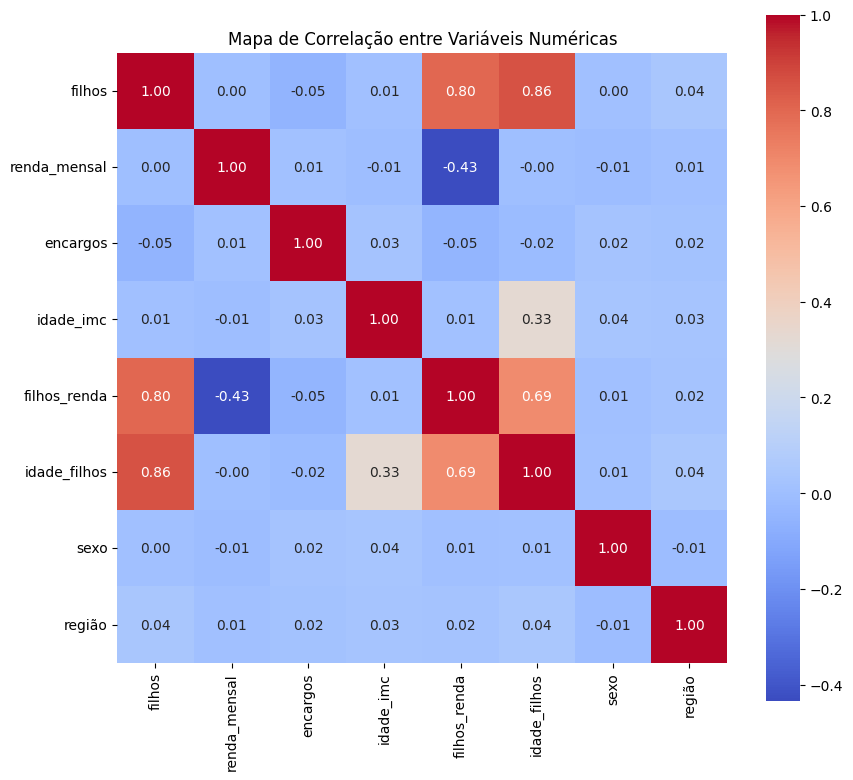

In [39]:
# Selecionar variáveis numéricas para o heatmap
corr_df = df[['filhos', 'renda_mensal',
              'encargos', 'idade_imc',
              'filhos_renda', 'idade_filhos',
              'sexo', 'região']]

# Calcular matriz de correlação
correlation_matrix = corr_df.corr()

# Plotar heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

# **Treinamento Random Forest** 🌲🌳🌿

In [40]:
# 1. Separar features e variável alvo

X = df.drop('encargos', axis=1)
y = df['encargos']

In [41]:
# 2. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Treinar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1, min_samples_leaf=1)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=0)

| Parâmetro            | Explicação                                                                |
| -------------------- | ------------------------------------------------------------------------- |
| n_estimators=200   | Número de árvores na floresta **200 árvores** (quanto mais, mais robusto, mas mais lento) |
| random_state=0     | Controla a aleatoriedade para **resultados reprodutíveis**                |
| n_jobs=-1          | Define quantos núcleos da CPU o modelo pode usar durante o treinamento e a previsão. -1 utiliza **todos os núcleos do processador** para acelerar o treinamento       |
| min_samples_leaf=1 | Cada folha (nó terminal) precisa ter no mínimo **1 amostra**              |


In [43]:
# 4. Fazer predições
y_pred = modelo_rf.predict(X_test)

In [44]:
# 5. Avaliar desempenho

#Baseline

baseline_pred = np.full_like(y_test, y_test.mean())

rmse_baseline = mean_squared_error(y_test, baseline_pred)
mae_baseline = mean_absolute_error(y_test, baseline_pred)

#Modelo

rmse_modelo = mean_squared_error(y_test, y_pred)
mae_modelo = mean_absolute_error(y_test, y_pred)

# 6. Porcentagem de melhora
melhora_rmse = (rmse_baseline - rmse_modelo) / rmse_baseline * 100
melhora_mae = (mae_baseline - mae_modelo) / mae_baseline * 100

r2 = r2_score(y_test, y_pred)


print(f"🎯 R²: {r2:.2f}%\n")

print(f"📊 RMSE Baseline: {rmse_baseline:.2f}")
print(f"📈 RMSE Modelo  : {rmse_modelo:.2f}")
print(f"✅ Redução RMSE : {melhora_rmse:.2f}%\n")

print(f"📊 MAE Baseline : {mae_baseline:.2f}")
print(f"📉 MAE Modelo   : {mae_modelo:.2f}")
print(f"✅ Redução MAE  : {melhora_mae:.2f}%")

🎯 R²: 0.83%

📊 RMSE Baseline: 189.62
📈 RMSE Modelo  : 32.79
✅ Redução RMSE : 82.71%

📊 MAE Baseline : 11.85
📉 MAE Modelo   : 3.63
✅ Redução MAE  : 69.34%


📊 Interpretação dos Resultados:


| Métrica  | Valor | Interpretação                                                                                   |
| -------- | ----- | ----------------------------------------------------------------------------------------------- |
| 🎯 **R² (Coeficiente de Determinação)**   | 0.83  | O modelo explica **83% da variação** dos encargos com as variáveis usadas. |
| 📊**Baseline (média)** | 189.62 | Erro médio ao prever sempre a média dos dados.                              |
| 📈 **RMSE** | 39.25 | Erro médio real do modelo.                                                                          |
| 📉 **MAE** | 4.19 | Erro médio absoluto — mostra que, em média, o modelo erra apenas 4.19 unidades, o que é excelente. |


* Validação estatística: 

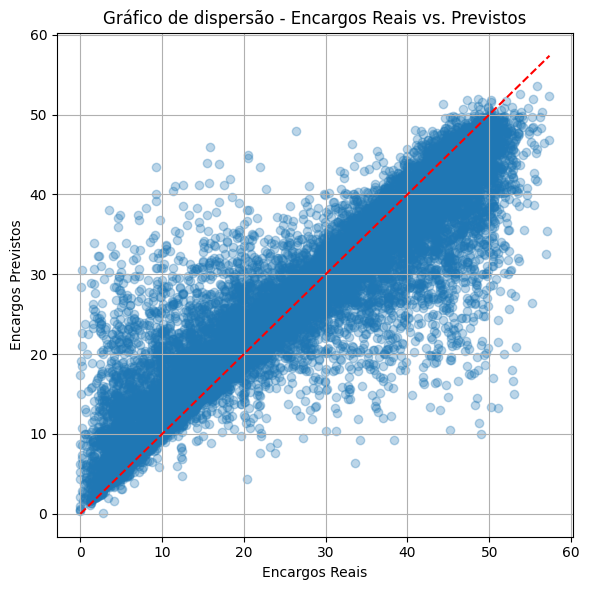

In [45]:
# Real vs Previsto

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gráfico de dispersão - Encargos Reais vs. Previstos')
plt.xlabel('Encargos Reais')
plt.ylabel('Encargos Previstos')
plt.grid(True)
plt.tight_layout()
plt.show()

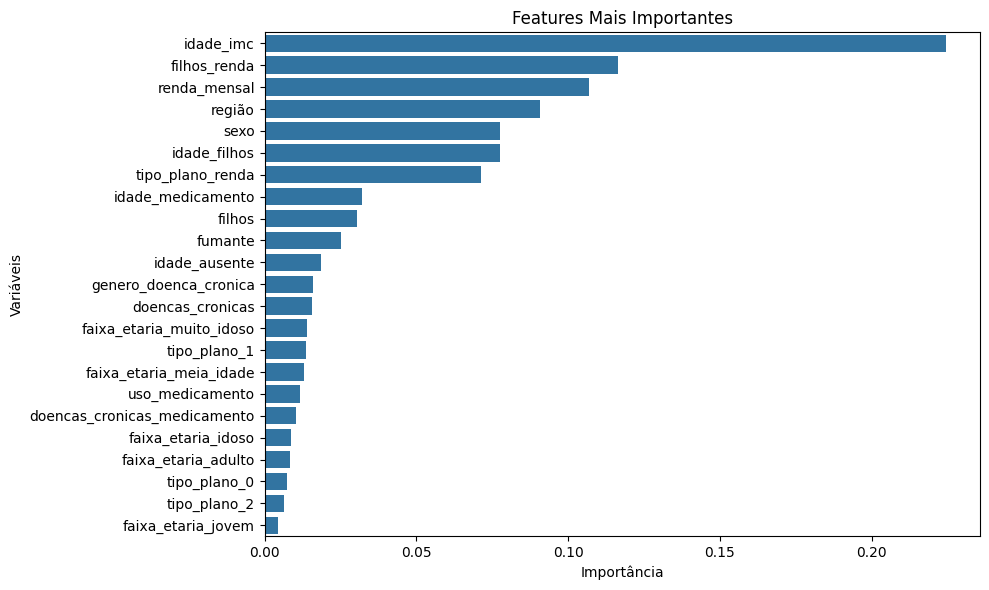

In [46]:
# Importâncias das features
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias_top = importancias.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_top.values, y=importancias_top.index)
plt.title('Features Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

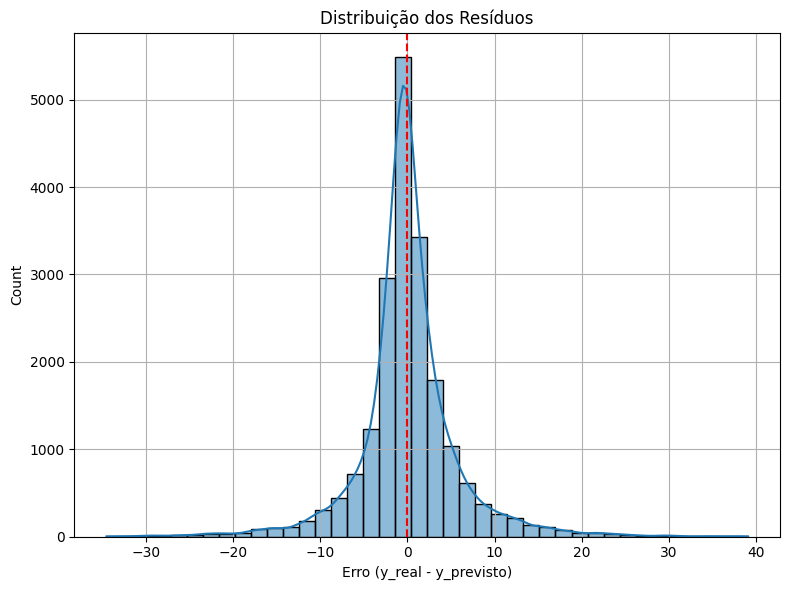

In [47]:
# Gráfico: Resíduos (Erros)

residuos = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=40, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel('Erro (y_real - y_previsto)')
plt.title('Distribuição dos Resíduos')
plt.grid(True)
plt.tight_layout()
plt.show()

✅ O que esse gráfico diz:

* Distribuição centrada no zero:
A maior parte dos erros está próxima de 0 — o modelo está fazendo boas previsões na média.

* Forma de sino (quase normal):
Indica que os erros são distribuídos de forma equilibrada, sem viés claro para superestimar ou subestimar os valores.

* Poucos outliers (nas pontas):
Erros maiores são raros, o que também é um bom sinal.

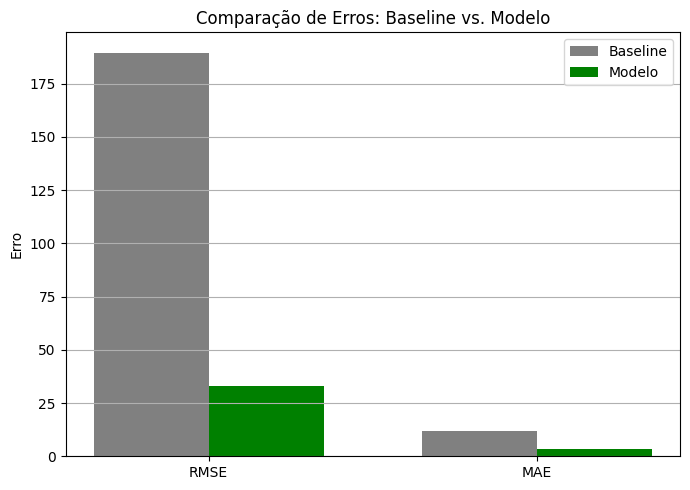

In [48]:
# Gráfico comparativo
labels = ['RMSE', 'MAE']
baseline_vals = [rmse_baseline, mae_baseline]
modelo_vals = [rmse_modelo, mae_modelo]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(x - width/2, baseline_vals, width, label='Baseline', color='gray')
ax.bar(x + width/2, modelo_vals, width, label='Modelo', color='green')

ax.set_ylabel('Erro')
ax.set_title('Comparação de Erros: Baseline vs. Modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()
